# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
sinasc['APGAR5'].fillna(sinasc['APGAR5'].mean())
sinasc.loc[sinasc['APGAR5'] <= 3, 'cat_apgar5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <=5), 'cat_apgar5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <=7), 'cat_apgar5'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] >= 8, 'cat_apgar5'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

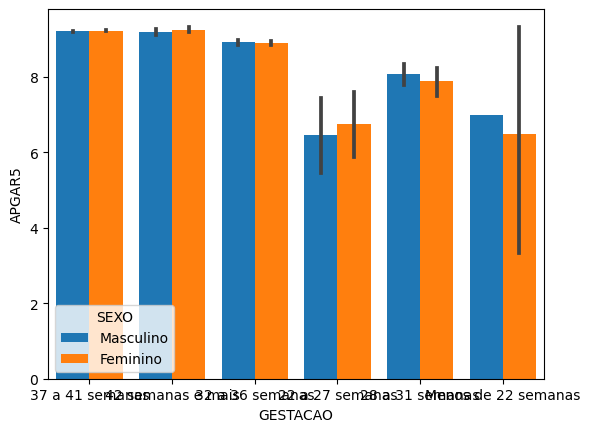

In [5]:
graf_apgar_x_gest = sns.barplot(data = sinasc, y = 'APGAR5',x = 'GESTACAO',hue = 'SEXO', saturation= 1,)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
apgar5_x_gest = pd.crosstab(columns = sinasc['APGAR5'], index = sinasc['GESTACAO'])
apgar5_x_gest

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
apgar5_x_gest_perct = apgar5_x_gest
apgar5_x_gest_perct.loc['22 a 27 semanas'] = (apgar5_x_gest_perct.loc['22 a 27 semanas']/ apgar5_x_gest_perct.loc['22 a 27 semanas'].sum())*100
apgar5_x_gest_perct.loc['28 a 31 semanas'] = (apgar5_x_gest_perct.loc['28 a 31 semanas']/ apgar5_x_gest_perct.loc['28 a 31 semanas'].sum())*100
apgar5_x_gest_perct.loc['32 a 36 semanas'] = (apgar5_x_gest_perct.loc['32 a 36 semanas']/ apgar5_x_gest_perct.loc['32 a 36 semanas'].sum())*100
apgar5_x_gest_perct.loc['37 a 41 semanas'] = (apgar5_x_gest_perct.loc['37 a 41 semanas']/ apgar5_x_gest_perct.loc['37 a 41 semanas'].sum())*100
apgar5_x_gest_perct.loc['42 semanas e mais'] = (apgar5_x_gest_perct.loc['42 semanas e mais']/ apgar5_x_gest_perct.loc['42 semanas e mais'].sum())*100
apgar5_x_gest_perct.loc['Menos de 22 semanas'] = (apgar5_x_gest_perct.loc['Menos de 22 semanas']/ apgar5_x_gest_perct.loc['Menos de 22 semanas'].sum())*100
indices = ['Menos de 22 semanas',
           '22 a 27 semanas',
           '28 a 31 semanas',
           '32 a 36 semanas',
           '37 a 41 semanas',
           '42 semanas e mais']
apgar5_x_gest_perct = apgar5_x_gest_perct.reindex(index = indices)
apgar5_x_gest_perct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

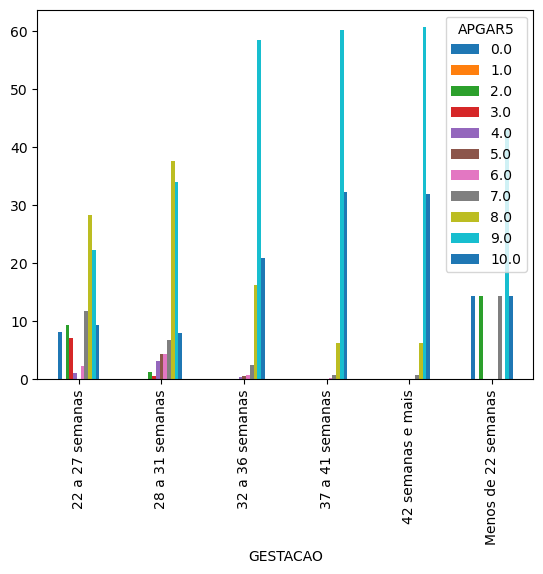

In [8]:
apgar5_x_gest.plot.bar()

 Esse conjunto de dados corrobora com a classificação dos medicos pois as ocorrencias de apgar abaixo de 8 começam a no periodo anterior a 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

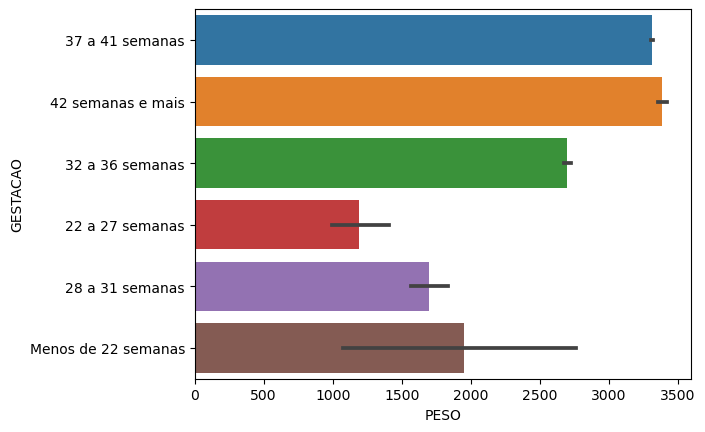

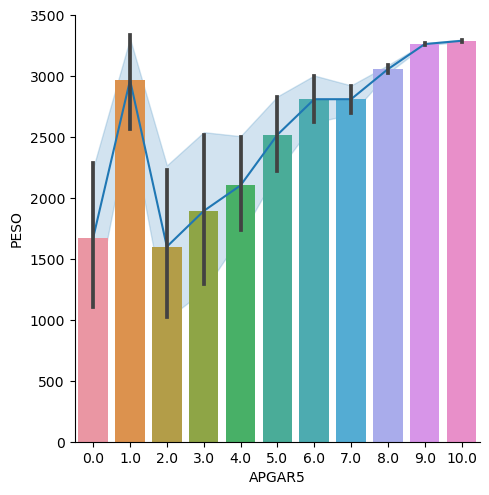

In [11]:
graf_gest_x_peso = sns.barplot(data = sinasc, y = 'GESTACAO',x = 'PESO')
graf_apgar_x_peso2 = sns.relplot(data = sinasc,kind='line', y = 'PESO',x = 'APGAR5')
graf_apgar_x_peso3 = sns.barplot(data = sinasc, y = 'PESO',x = 'APGAR5')


Não foi constatada relação entre apgar e o peso.